## Home Credit Default Risk Competition
https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction  

대출자가 부동산 대출 상환을 정해진 날짜에 할지 말지 0, 1 을 예측하는 분류모델.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder

In [2]:
print(os.listdir('./input/House/'))
# 경로에 10개의 파일이 있음.

['application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'sample_submission.csv']


In [3]:
train = pd.read_csv('./input/House/application_train.csv')
print('Training data shape:', train.shape)
train.head()

Training data shape: (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
test = pd.read_csv('./input/House/application_test.csv')
print('Testing data shape:', test.shape)
test.head()
# train set 과는 target 이 있고 없고의 차이.

Testing data shape: (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


1. Target variable 은 binary(0 or 1). 0이 갚는 사람, 1이 늦게 갚는사람
2. column 은 121 개
3. 결측치를 확인한다
4. EDA 진행한다.
5. 데이터에 대해서 조금 더 알아본다.

In [5]:
# EDA
train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [6]:
print('Target variable Ratio : {:.2f}%'.format(100*train['TARGET'].value_counts()[1]/len(train)))

Target variable Ratio : 8.07%


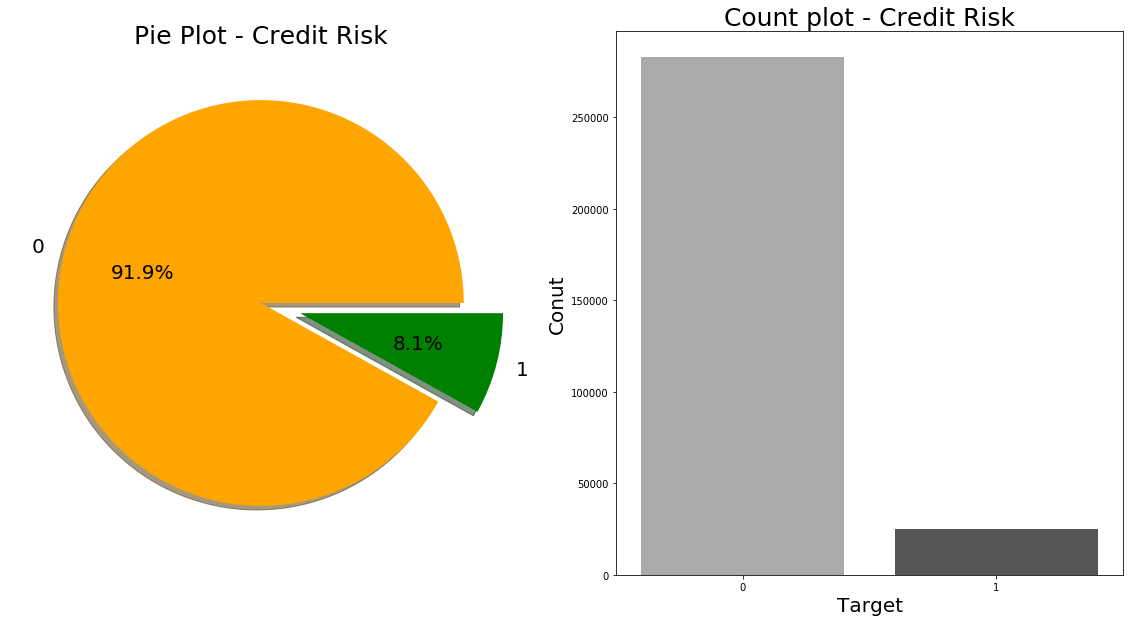

In [7]:
# target variable 시각화 그림이 별로 마음에 안들어서 이전에 썼던 다른 그림으로 대체
# Target Variable plot
f, ax = plt.subplots(1,2, figsize=(20, 10))

# pie chart -> sns plot 이나 pyplot 으로 바꿔보기
train['TARGET'].value_counts().plot.pie(explode=[0, 0.2], autopct='%1.1f%%', 
                                        ax=ax[0], shadow=True, fontsize=20, colors=['orange', 'green'])
ax[0].set_title('Pie Plot - Credit Risk', fontsize=25)
ax[0].set_ylabel('')

# count plot
sns.countplot('TARGET', data=train, ax=ax[1], palette='binary')
ax[1].set_title('Count plot - Credit Risk', fontsize=25)
plt.ylabel('Conut', fontsize=20)
plt.xlabel('Target', fontsize=20)

plt.show()

타겟 변수의 불균형이 발생했음을 알 수 있음.  
1 이 8% 정도 0 이 92% 정도. undersampling 이 필요함.  
모델링할 때 데이터 조절이 필요함.  
plot.pie 안에 글씨 크기 조절 fontsize
색상조절은 colors 하고 개수만큼 리스트로 색상 나열

sns.countplot 색상은 palette, color
label은 따로 plt.ylabel, xlabel 해주고 fontsize

([<matplotlib.patches.Wedge at 0x17293211248>,
 [Text(-1.0648123216659293, 0.27599768047650985, ''),
  Text(1.258414554334053, -0.32617910638210273, '')],
 [Text(-0.5808067209086887, 0.15054418935082356, '91.9%'),
  Text(0.7744089565132634, -0.20072560392744784, '8.1%')])

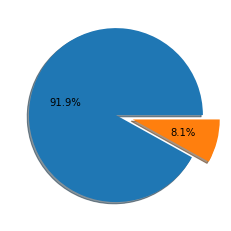

In [8]:
x = train['TARGET'].value_counts()
plt.pie(x, explode=(0, 0.2), autopct='%1.1f%%', shadow=True)
# 이걸 조금 다듬으면 pd.plot.pie 대신 사용 가능

In [9]:
# Examine Missing Values
# number and percentage of missing values in each columns
def missing_values_table(df):
    # total missing values
    mis_val = df.isnull().sum()
    # percentage of missing values
    mis_val_percent = 100*df.isnull().sum() / len(df)
    # make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    
    # sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values('% of Total Values', ascending=False).round(1)
    
    # print some summary information
    print('Your selected dataframe has ' + str(df.shape[1]) + ' columns.\n'
          'There are ' + str(mis_val_table_ren_columns.shape[0]) +
         ' columns that have missing values.')
    
    # return the dataframe with missing information
    return mis_val_table_ren_columns

In [10]:
missing_values = missing_values_table(train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


아까 train set column이 122개 였는데 결측치 존재하는 column 이 122개.  
즉 모든 column에 결측치가 존재한다.  
결측치 비율 많은건 70% 정도까지 존재함. -> 결측치가 엄청 많음.  
숫자 말고 시각화로도 결측치가 어느 정도 되는지 보는게 좋겠음. 감이 확오게

In [11]:
# 결측치 시각화 라이브러리 missingno
import missingno as msno

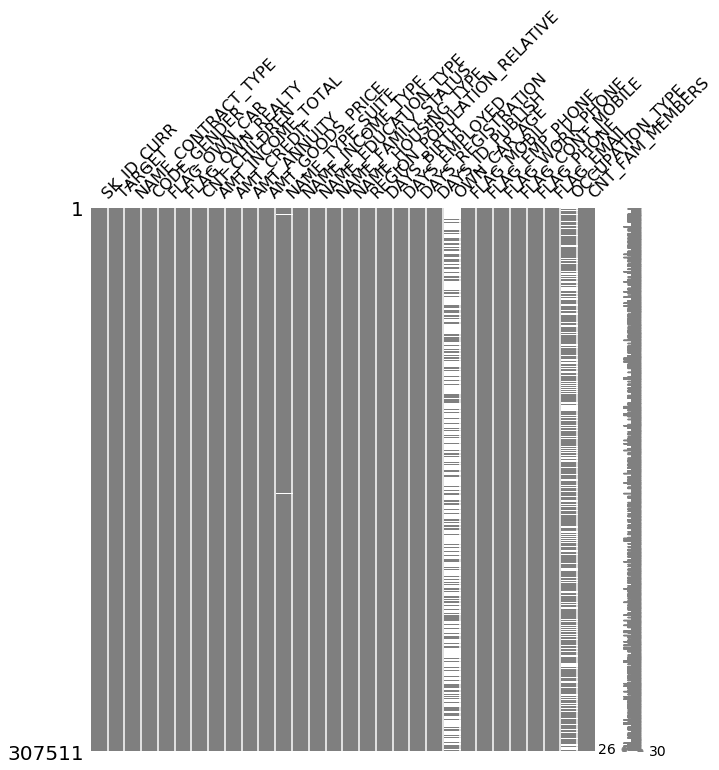

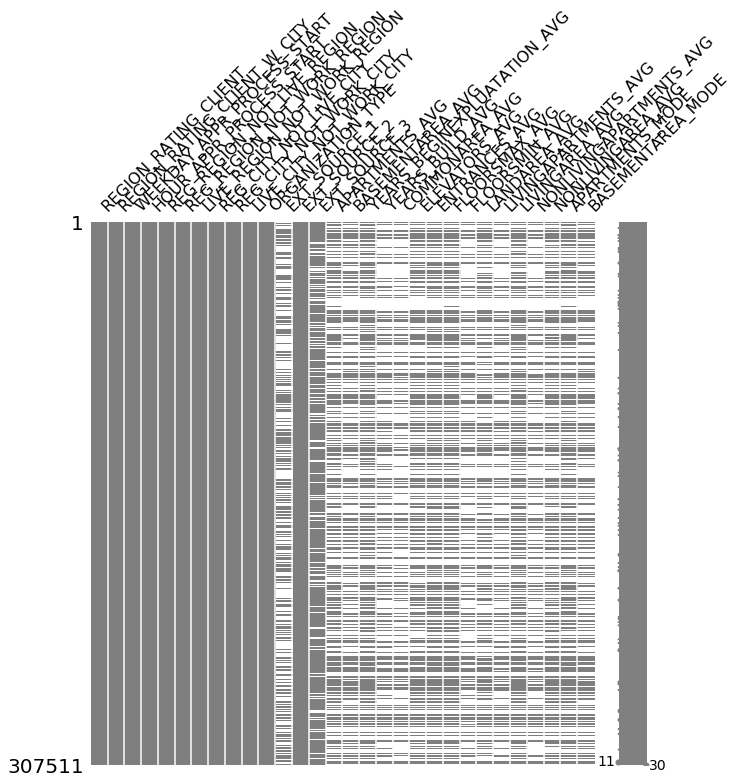

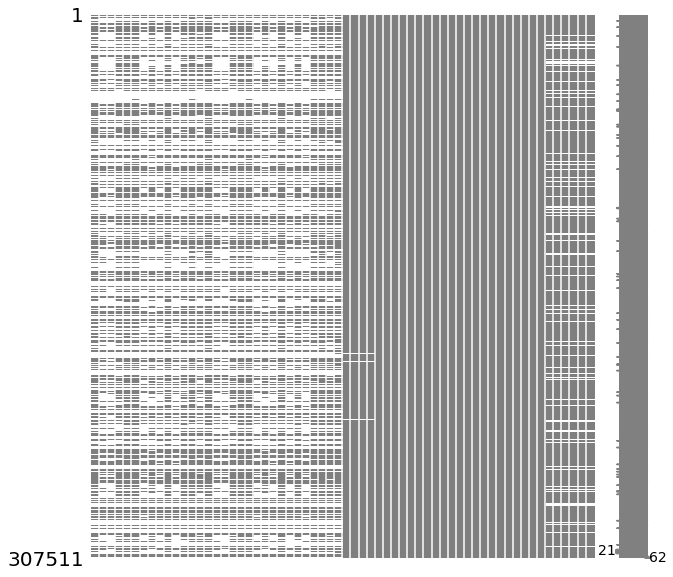

In [12]:
msno.matrix(df=train.iloc[:, :30], figsize=(10, 10), color=(0.5, 0.5, 0.5))
msno.matrix(df=train.iloc[:, 30:60], figsize=(10, 10), color=(0.5, 0.5, 0.5))
msno.matrix(df=train.iloc[:, 60:], figsize=(10, 10), color=(0.5, 0.5, 0.5))

결측치가 없는 column 도 있지만 많은 곳은 정말 많다는 것을 알 수 있음.  
결측치가 많은 column 을 어떻게 처리할 것인지 고민해봐야함.  
When it comes time to build our machine learning models, we will have to fill in these missing values (known as imputation). In later work, we will use models such as XGBoost that can handle https://stats.stackexchange.com/questions/235489/xgboost-can-handle-missing-data-in-the-forecasting-phase. Another option would be to drop columns with a high percentage of missing values, although it is impossible to know ahead of time if these columns will be helpful to our model. Therefore, we will keep all of the columns for now.  
XGboost 는 결측치를 내부적으로 처리해준다? -> 그렇다고함. 무슨 원리인지는?

In [13]:
# Column types
train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [14]:
train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)
# 특정 dtype 의 column 만 선택해주는 함수. select_dtype('dtype')
# apply 는 함수 적용
# nunique() : NaN 을 제외한 unique 의 개수를 구해줌. axis = 0 이면 행을 말함.

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

categorical data 는 encoding 을 해줘야 한다.  
컴퓨터, 모델이 읽을 수 있는 타입으로 만드는 것을 인코딩이라고 함.  
Label encoding, One-Hot encoding 이라는 것이 있음.  
라벨 인코딩은 카테고리가 2개만 있을 경우를 제외하고는 추천하지 않고 대부분 원-핫 인코딩을 해주는 것이 좋고 일반적이다.  
인코딩 방법도 많이 있음. 프로젝트마다다르게 해야함. 차원 축소하면서 인코딩하는 방법도 있음. 

In [15]:
# Label Encoding and One-hot encoding
# for label encoding, use scikit learn 'LabelEncoder'and for one-hot encoding, use pandas get_dummies(df) 

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in train:
    if train[col].dtype == 'object':
        # if 2 or fewer unique categories
        if len(list(train[col].unique())) <= 2:
            le.fit(train[col])
            train[col] = le.transform(train[col])
            test[col] = le.transform(test[col])
            
            le_count += 1

print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [16]:
# One-hot encoding
train = pd.get_dummies(train)
test = pd.get_dummies(test)

print('Training Features shape: ', train.shape)
print('Testing Features shape: ', test.shape)

# 원핫 인코딩으로 더미변수 생성해서 column 이 늘어난 것을 확인할 수 있음. 

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


In [17]:
# align dataframe 을 만들어라. 조정? 나란한? 함치는 것 같은데 inner 나 axis 봤을때
train_label = train['TARGET']

train, test = train.align(test, join = 'inner', axis=1)
train['TARGET'] = train_label

print('Training Features shape :', train.shape)
print('Testing Features shape :', test.shape)

Training Features shape : (307511, 240)
Testing Features shape : (48744, 239)


pandas.dataframe.align  
Align two objects on their axes with the specified join method for each axis index  
데이터 프레임을 join 하는 함수이다. series 도 가능.   
df.align(other, join='inner, outer, left, right', axis, method, level, copy)  
  
여러가지 차원축소 방법 https://en.wikipedia.org/wiki/Dimensionality_reduction

In [18]:
# EDA - Anomalies Data
# 나이 데이터 같은데, 뭔가 잘못되어있다고함. 음수값? 나이가 아니라 남은 상환일? 뭐 이런거 일 수도 있음. 
(train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [19]:
train['DAYS_EMPLOYED'].describe()
# 이상한 데이터가 있다. 뭐 이런걸 describe 로 보여주려는 것 같음.

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

Text(0.5, 0, 'Days Employment')

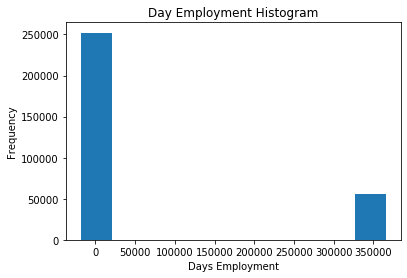

In [20]:
train['DAYS_EMPLOYED'].plot.hist(title = 'Day Employment Histogram');
plt.xlabel('Days Employment')

# 이상치가 있는 걸 보여주고 싶었던 것 같은데, 잘 보이기는 하는데
# 이거말고 다른 그림이 더 좋지 않을까 싶은 생각이 들음. -> kde 나 violin. x축이 너무 넓어서 안되려나?  

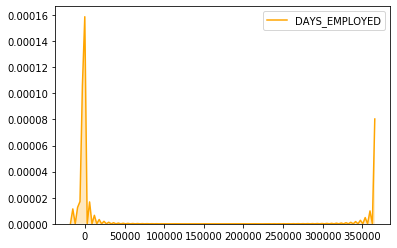

In [21]:
sns.kdeplot(train['DAYS_EMPLOYED'], bw='silverman', shade=True, color='orange')
# histogram 보다는 kdeplot 이 이상치를 더 잘 보여주는 것 같음.

In [22]:
anom = train[train['DAYS_EMPLOYED'] == 365243]
non_anom = train[train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100*non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100*anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

# 이상치? 라고 보면 될 것 같음. 그걸 describe 로 파악을 했고 그래프 그려봤고
# 이상치 중에서 1 인 비율, 이상치 아닌 것 중에서 1의 비율을 print 한 것.
# 그리고 마지막은 anomalous 데이터의 수

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


Text(0.5, 0, 'Days employment')

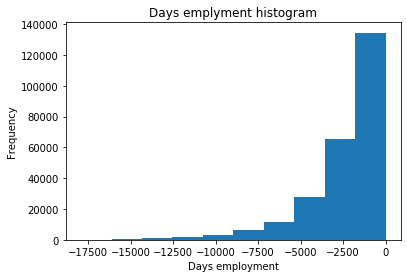

In [23]:
# Create an anomalous flag column
train['DAYS_EMPLOYED_ANOM'] = train['DAYS_EMPLOYED'] == 365243
# Replace the anomalous values with nan
train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace=True)

train['DAYS_EMPLOYED'].plot.hist(title = 'Days emplyment histogram');
plt.xlabel('Days employment')

In [24]:
test['DAYS_EMPLOYED_ANOM'] = test['DAYS_EMPLOYED'] == 365243
test['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace=True)

print('There are %d anomalies in the test data out of %d entries' % (test['DAYS_EMPLOYED_ANOM'].sum(), len(test)))

There are 9274 anomalies in the test data out of 48744 entries


In [25]:
# Correlations
# correlations between the features and the target. dtype 은 float64
correlations = train.corr()['TARGET'].sort_values()

print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))
# 15개만 보여줌. 양, 음 따라 다르게
# 변수가 너무 많아서 히트맵 그리기 어려움. 아까 float 이랑 int 만 100개가 넘었음

Most Positive Correlations:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

In [26]:
# find the correlation of the positive days since birth and target
train['DAYS_BIRTH'] = abs(train['DAYS_BIRTH'])
train['DAYS_BIRTH'].corr(train['TARGET'])

-0.07823930830982737

In [27]:
# set the style of plots
plt.style.use('fivethirtyeight')

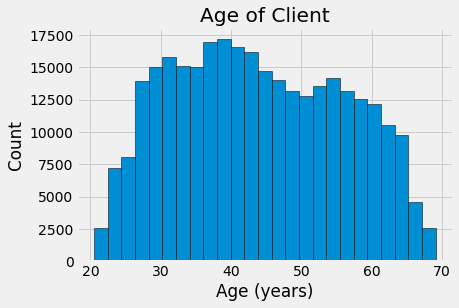

In [28]:
plt.hist(train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins=25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

# bins 는 구간을 몇개로 쪼갤 것인지

Text(0, 0.5, 'Density')

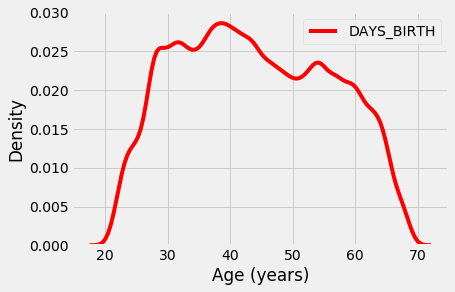

In [29]:
sns.kdeplot(train['DAYS_BIRTH']/365, color='red')
plt.xlabel('Age (years)')
plt.ylabel('Density')
# 30-40 대가 많고 50 초반도 많다.

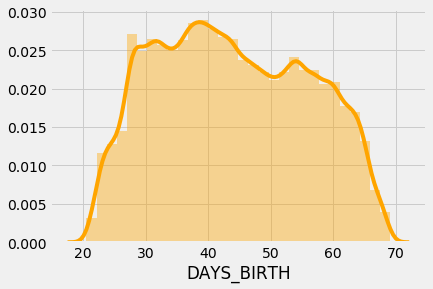

In [30]:
sns.distplot(train['DAYS_BIRTH']/365, color='orange', bins=30, norm_hist=True)
# 셋 중에 뭘로 보든 나이의 분포를 파악하기에는 좋음. hist 보다는 선으로 된게 더 좋지 않나 싶음.  

Text(0.5, 1.0, 'Distribution of Ages')

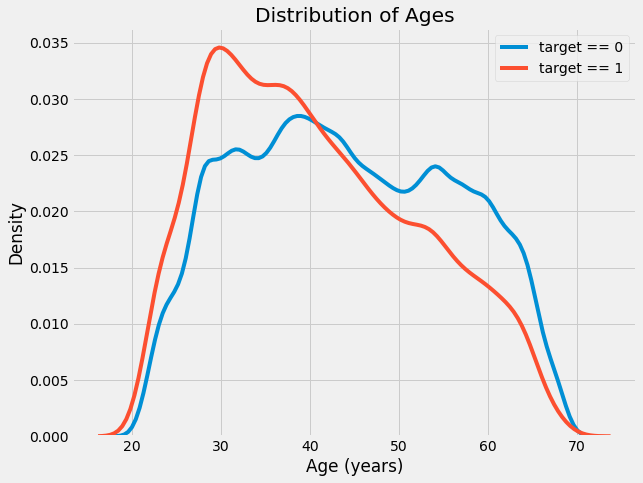

In [31]:
plt.figure(figsize=(9,7))

sns.kdeplot(train.loc[train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')
sns.kdeplot(train.loc[train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.title('Distribution of Ages')

# 나이에 따른 0과 1의 차이가 있음을 알 수 있다. 

In [32]:
# Age information into a separate dataframe
age_data = train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num=11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


pd.cut : 동일한 길이로 나누어서 범주 만들기  
동일한 길이로 나눠서 범주 만드는 것은 자동으로 되는 것 같음. 다만 원하는 특정 길이로 만드려면 범위 지정해서 따로 적어줘야함.  
pd.qcut : 동일한 개수로 나누어서 범주 만들기 (범주 안에 동일한 개수 들어오도록)  

pd.cut( 나누고 싶은 data, bins=나누고 싶은 개수)  
참고 https://rfriend.tistory.com/404

In [33]:
# 나눴던 구간들로 groupby 가 가능. groupby 해서 여러 연산 적용.
# 여러 연산을 적용하고 싶으면 agg(['원하는 통계 함수'])
age_groups = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


In [34]:
age_data.groupby('YEARS_BINNED').agg(['mean', 'sum'])

TARGET          DAYS_BIRTH            YEARS_BIRTH  \
                  mean   sum          mean        sum        mean   
YEARS_BINNED                                                        
(20.0, 25.0]  0.123036  1496   8532.795625  103750262   23.377522   
(25.0, 30.0]  0.111436  3662  10155.219250  333720815   27.822518   
(30.0, 35.0]  0.102814  4055  11854.848377  467555220   32.479037   
(35.0, 40.0]  0.089414  3833  13707.908253  587630611   37.555913   
(40.0, 45.0]  0.078491  3250  15497.661233  641696161   42.459346   
(45.0, 50.0]  0.074171  2606  17323.900441  608675242   47.462741   
(50.0, 55.0]  0.066968  2340  19196.494791  670763921   52.593136   
(55.0, 60.0]  0.055314  1832  20984.262742  694998782   57.491131   
(60.0, 65.0]  0.052737  1449  22780.547460  625918322   62.412459   
(65.0, 70.0]  0.037270   302  24292.614340  196843054   66.555108   

                            
                       sum  
YEARS_BINNED                
(20.0, 25.0]  2.842473e+05  
(25.0, 30.0]  9.143036e+05  
(30.0, 35.0]  1.280973e+06  
(35.0, 40.0]  1.609947e+06  
(40.0, 45.0]  1.758072e+06  
(45.0, 50.0]  1.667603e+06  
(50.0, 55.0]  1.837709e+06  
(55.0, 60.0]  1.904106e+06  
(60.0, 65.0]  1.714845e+06  
(65.0, 70.0]  5.392960e+05

Text(0.5, 1.0, 'Failure to Repay b Age Group')

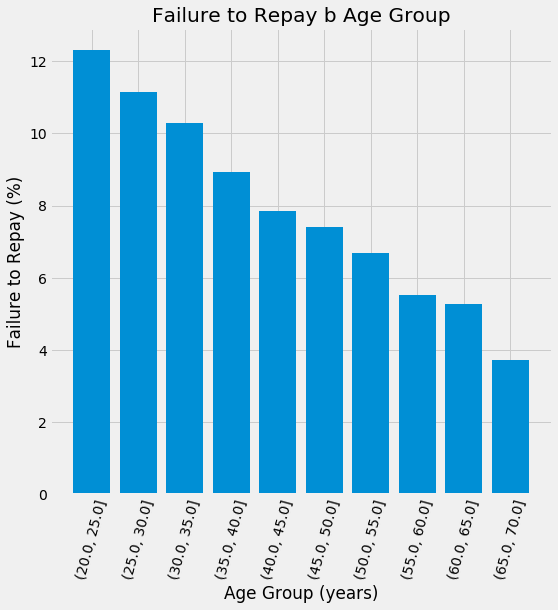

In [35]:
plt.figure(figsize=(8, 8))

plt.bar(age_groups.index.astype(str), 100*age_groups['TARGET'])

plt.xticks(rotation=75)
plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay b Age Group')

### 인사이트 도출
There is a clear trend: younger applicants are more likely to not repay the loan! The rate of failure to repay is above 10% for the youngest three age groups and beolow 5% for the oldest age group.  
젊은 사람들한테 대출해줄 때 추가적으로 주의하거나 관리를 할 필요가 있다.

In [36]:
# Exterior Sources
# negative correlations with EXt_SOURCE_1, 2, 3
ext_data = train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


Text(0.5, 1, 'Correlation Heatmap')

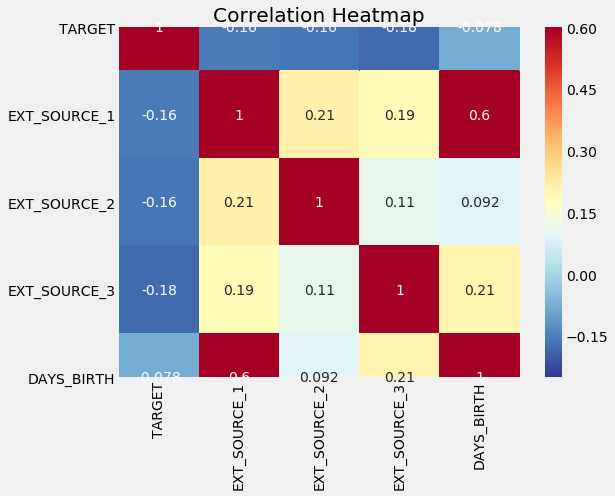

In [37]:
plt.figure(figsize=(8,6))
# Correlations Heatmap
sns.heatmap(ext_data_corrs, cmap=plt.cm.RdYlBu_r, vmin = -0.25, annot=True, vmax = 0.6)
plt.title('Correlation Heatmap')

According to the documentation, these features represent a "normalized score from external data source". I'm not sure what this exactly means, but it may be a cumulative sort of credit rating made using numerous sources of data.

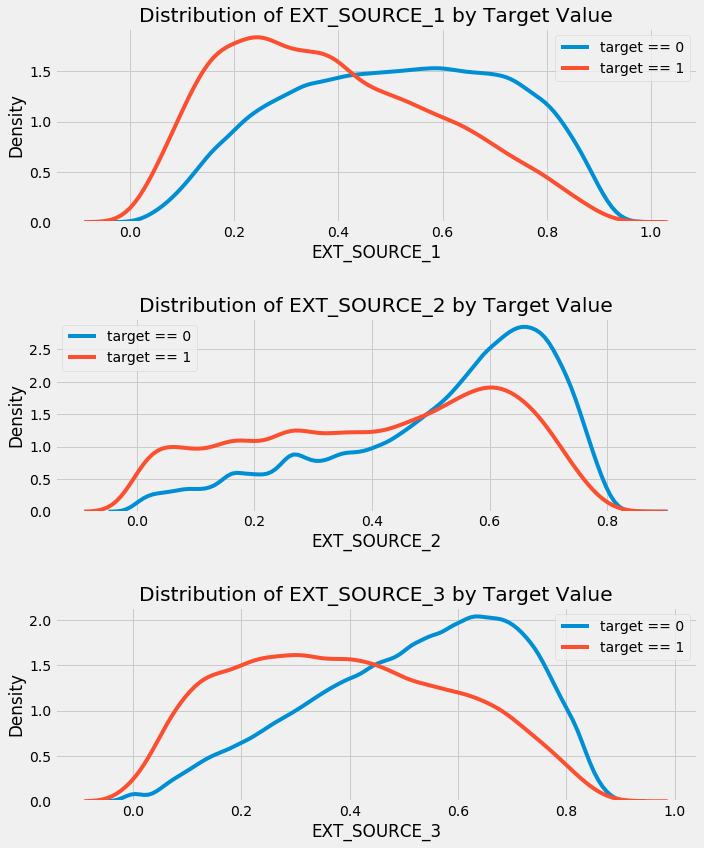

In [38]:
plt.figure(figsize=(10,12))

for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    plt.subplot(3, 1, i+1)
    sns.kdeplot(train.loc[train['TARGET'] == 0, source], label = 'target == 0')
    sns.kdeplot(train.loc[train['TARGET'] == 1, source], label = 'target == 1')
    
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source)
    plt.ylabel('Density')
    
plt.tight_layout(h_pad = 2.5)

EXT_SOURCE_1,2,3 모두 target이 0 일때 1일때 다른 분포 양상을 보였음.  
1, 3 는 뚜렷한 차이를 보였고 2도 어느정도 차이를 보였음. -> 모델링에서 쓸만한 변수가 될 것임.  

enumerate 함수  
1. 리스트가 있는 경우 순서와 리스트의 값을 전달하는 기능. (순서랑 값 2개)  
2. enumerate 는 '열거하다' 순서가 있는 자료형을 입력으로 받아 인덱스 값을 포함하는 enumerate 객체를 리턴.  
3. 보통 for 문과 자주 함께 사용된다.  
for i, name in enumerate(['body', 'foo', 'bar']):  
     print(i, name)  
4. for문처럼 반복되는 구간에서 객체가 현재 어느 위치레 있는지 알려주는 인덱스 값이 필요할 때 enumerate 함수를 사용하면 매우 유용하다. 

Text(0.5, 1.05, 'Ext Source and Age Features Pairs Plot')

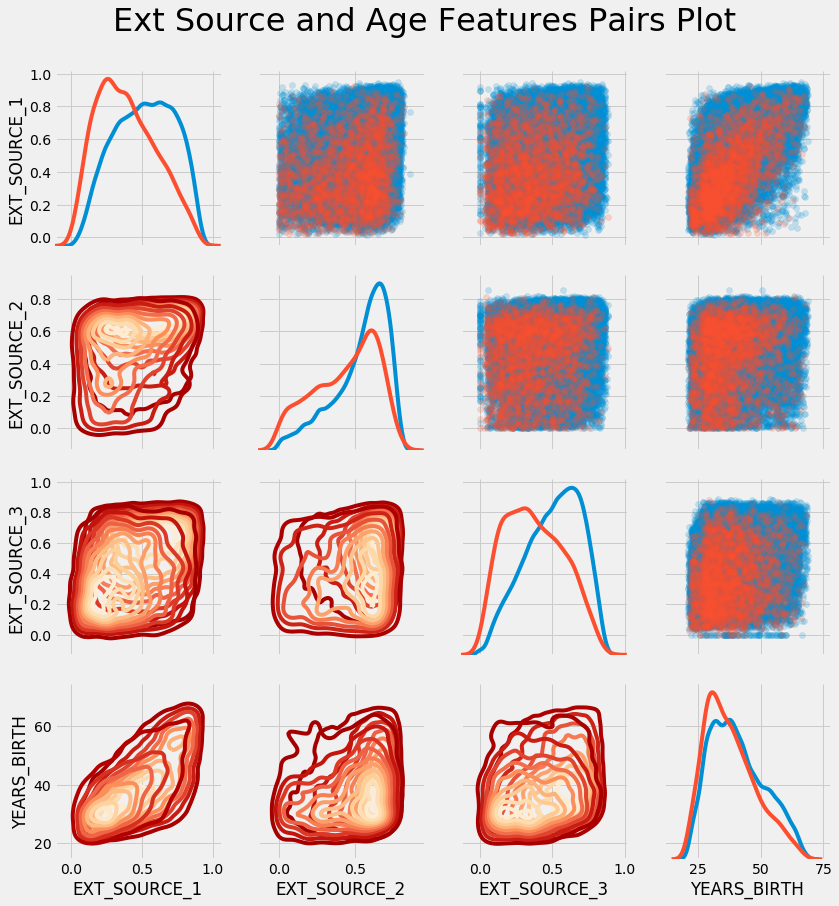

In [39]:
# pairs plot
# EXT_SOURCE, DAYS_BIRTH  pairs plot
plot_data = ext_data.drop(columns = ['DAYS_BIRTH']).copy()

plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']

plot_data = plot_data.dropna().loc[:100000, :]

def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate('r = {:.2f}'.format(r),
               xy=(.2, .8), xycoords=ax.transAxes,
               size=20)
    
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey = False,
                   hue='TARGET',
                   vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

grid.map_upper(plt.scatter, alpha = 0.2) # 대각선 위쪽
grid.map_diag(sns.kdeplot) # 대각선
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r) # 대각선 아래쪽

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05)

그림을 그리기는 했는데 뭘 보려고 그린건지 잘 모르겠음. source_1 이랑 Years 랑 관계 있는 건 알겠는데, 나머지는 무슨 의미가 있는지 파악이 안됨.  
같은 정보를 제공하는 plot 중에 이거 말고 다른건 없을까?

## Feature engineering  
적절한 모델 설정, 모델에 맞는 feature 설정이 중요  
While choosing the right model and optimal settings are important, the model can only learn from the data it is given. Making sure this data is as relevant to the task as possible is the job of the data scientist (and maybe some automated tools to help us out). 

Feature engineering refers to a geneal process and can involve both feature   construction: adding new features from the existing data, and feature selection: choosing only the most important features or other methods of dimensionality reduction. There are many techniques we can use to both create features and select features.  

We will do a lot of feature engineering when we start using the other data sources, but in this notebook we will try only two simple feature construction methods:  

Polynomial features(교호작용 변수 생성)  
Domain knowledge features(도메인 지식 활용)  

In [40]:
# Polynomial Features
# 너무 과하게 만들면 과적합 발생할 수 있음.
# 모든 교호작용 변수를 만들기에는 과적합 우려가 있음. -> 몇 가지만 추려서 작업. 이걸 선별하는 것도 분석가의 재량임. 
poly_features = train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

# imputer for handling missing values
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy='median')

poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns = ['TARGET'])

poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.fit_transform(poly_features_test)

from sklearn.preprocessing import PolynomialFeatures
poly_transformer = PolynomialFeatures(degree = 3)
# degree : 차수

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [41]:
# train the polynomial features
poly_transformer.fit(poly_features)
# transform the features
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape :', poly_features.shape)
print('Polynomial Features shape test :', poly_features_test.shape)

Polynomial Features shape : (307511, 35)
Polynomial Features shape test : (48744, 35)


In [42]:
poly_transformer.get_feature_names(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:15]

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'DAYS_BIRTH^2']

In [43]:
# Create a dataframe of the features
# 앞서 만든 Polynomial data를 데이터 프레임으로 만들기
poly_features = pd.DataFrame(poly_features, columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']))
# add target
poly_features['TARGET'] = poly_target

poly_corrs = poly_features.corr()['TARGET'].sort_values()

print(poly_corrs.head(10))
print(poly_corrs.tail(5))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_2 DAYS_BIRTH                  -0.156873
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
Name: TARGET, dtype: float64
DAYS_BIRTH     -0.078239
DAYS_BIRTH^2   -0.076672
DAYS_BIRTH^3   -0.074273
TARGET          1.000000
1                    NaN
Name: TARGET, dtype: float64


In [44]:
# test data
poly_features_test = pd.DataFrame(poly_features_test, columns=poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Merge polynomial features into training dataframe
poly_features['SK_ID_CURR'] = train['SK_ID_CURR']
train_poly = train.merge(poly_features, on = 'SK_ID_CURR', how='left')
# Merge polynomial features into testing dataframe
poly_features_test['SK_ID_CURR'] = test['SK_ID_CURR']
test_poly = test.merge(poly_features_test, on = 'SK_ID_CURR', how='left')

train_poly, test_poly = train_poly.align(test_poly, join='inner', axis=1)

print('Training data with polynomial features shape:', train_poly.shape)
print('Testing data with polynomial features shape:', test_poly.shape)

Training data with polynomial features shape: (307511, 275)
Testing data with polynomial features shape: (48744, 275)


1. correlation 을 보고 polynomial 만들 변수들 선정해서 polynomial 변수 생성  
2. 기존 dataframe 에 merge 시켜서 column 추가 -> merge 랑 align  
3. shape 로 잘 붙었는지 확인  
4. 이것들 외에도 feature engineering 에는 종류가 많음. 다양한 방법, 실행 방법 익히기

In [49]:
# Domain knowledge features
# 전문가는 아니지만 알고 있는 금융지식 동원, 다른 사람이 사용한 커널 참고
# https://www.kaggle.com/jsaguiar/lightgbm-with-simple-features
train_domain = train.copy() # 복사본을 만듬. 
test_domain = test.copy()

train_domain['CREDIT_INCOME_PERCENT'] = train_domain['AMT_CREDIT'] / train_domain['AMT_INCOME_TOTAL']
train_domain['ANNUITY_INCOME_PERCENT'] = train_domain['AMT_ANNUITY'] / train_domain['AMT_INCOME_TOTAL']
train_domain['CREDIT_TERM'] = train_domain['AMT_ANNUITY'] / train_domain['AMT_CREDIT']
train_domain['DAYS_EMPLOYED_PERCENT'] = train_domain['DAYS_EMPLOYED'] / train_domain['DAYS_BIRTH']

In [50]:
# test 데이터에 적용
test_domain['CREDIT_INCOME_PERCENT'] = test_domain['AMT_CREDIT'] / test_domain['AMT_INCOME_TOTAL']
test_domain['ANNUITY_INCOME_PERCENT'] = test_domain['AMT_ANNUITY'] / test_domain['AMT_INCOME_TOTAL']
test_domain['CREDIT_TERM'] = test_domain['AMT_ANNUITY'] / test_domain['AMT_CREDIT']
test_domain['DAYS_EMPLOYED_PERCENT'] = test_domain['DAYS_EMPLOYED'] / test_domain['DAYS_BIRTH']

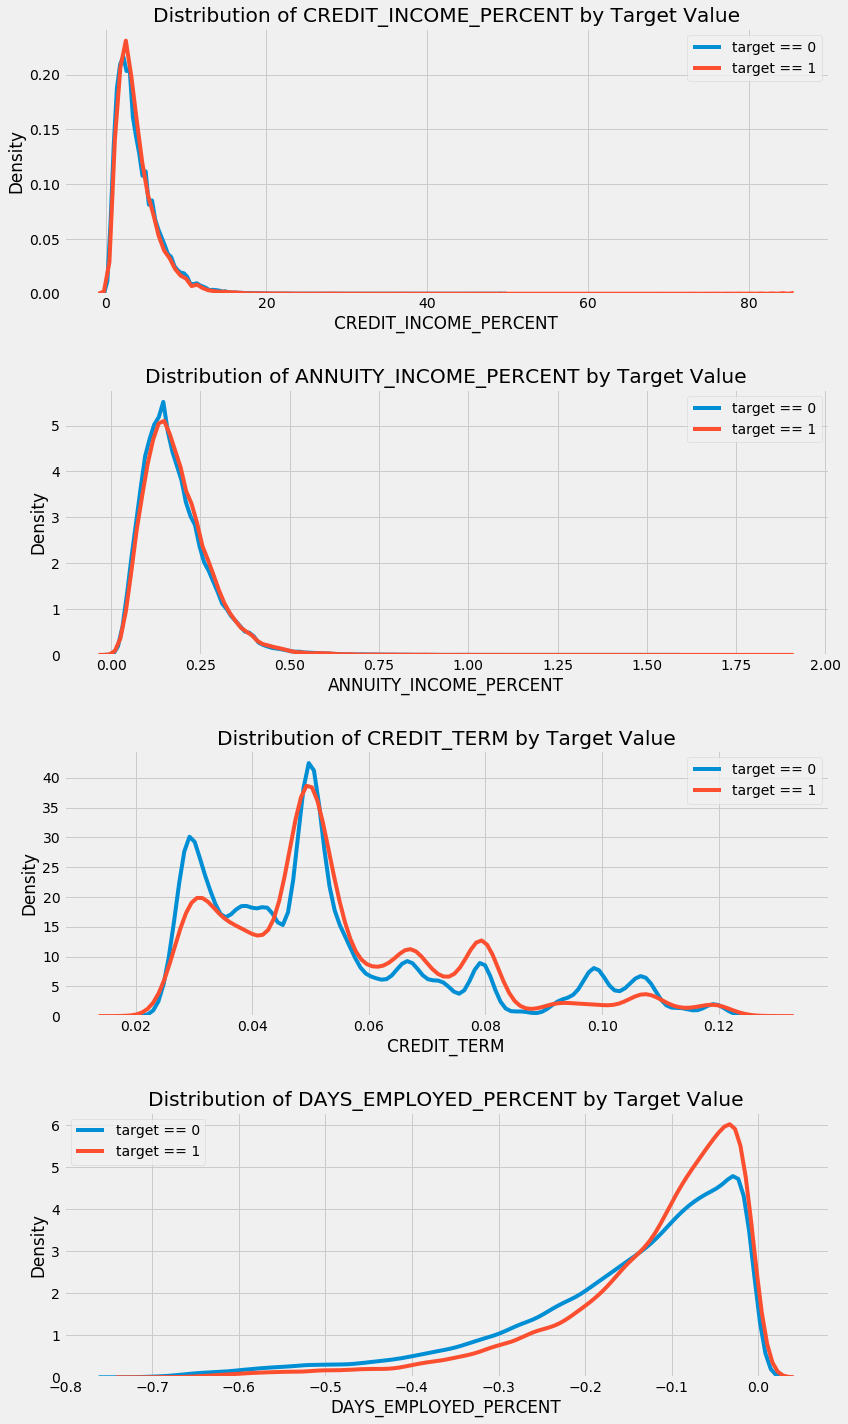

In [51]:
# Visualize New Variables
plt.figure(figsize=(12, 20))
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):
    plt.subplot(4, 1, i+1)
    sns.kdeplot(train_domain.loc[train_domain['TARGET'] == 0, feature], label = 'target == 0')
    sns.kdeplot(train_domain.loc[train_domain['TARGET'] == 1, feature], label = 'target == 1')
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel(feature) # '%s' % feature 대신 저렇게 feature 만 써놔도 된다. 
    plt.ylabel('Density')
    
plt.tight_layout(h_pad=2.5)

### 결측치 입력, 데이터 스케일링, 범주형 변수 인코딩 등 전처리 수행

In [53]:
from sklearn.preprocessing import MinMaxScaler, Imputer

# drop the target from the training data
if 'TARGET' in train:
    trainset = train.drop(columns = ['TARGET'])
else:
    trainset = train.copy()
# Feature names    
features = list(trainset.columns)
# Copy of the testing data
testset = test.copy()
# Median imputation of missing values
imputer = Imputer(strategy = 'median')
# Scale each feature ti 0-1
scaler = MinMaxScaler(feature_range = (0, 1))
# Fit on the training data
imputer.fit(trainset)
# Transform both training and testing data
trainset = imputer.transform(trainset)
testset = imputer.transform(test)
# Repeat with the scaler
scaler.fit(trainset)
trainset = scaler.transform(trainset)
testset = scaler.transform(testset)

print('Training data shape: ', trainset.shape)
print('Testin data shape :', testset.shape)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Training data shape:  (307511, 240)
Testin data shape : (48744, 240)


In [55]:
# Logistic Regression 적용 - 첫 번째 모델
from sklearn.linear_model import LogisticRegression
# make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.0001)
# Train on the training data
log_reg.fit(trainset, train_label) # train_label 은 저기 위에서 만들었음.

LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

C 값으로 regularization 이 많이 적용됨.  
regularization 이 강할수록 수평적으로 그려지고 C 값이 클수록 decision boundary는 최대한 train data에 맞추려고함. 즉 overfitting 의 가능성이 증가함.  
C 값이 클수록 과적합 위험 증가, 작을수록 정규화. 디폴트는 1.0 

Now that the model has been trained, we can use it to make predictions. We want to predict the probabilities of not paying a loan, so we use the model predict.proba method. This returns an m x 2 array where m is the number of observations. The first column is the probability of the target being 0 and the second column is the probability of the target being 1 (so for a single row, the two columns must sum to 1). We want the probability the loan is not repaid, so we will select the second column.

The following code makes the predictions and selects the correct column.

In [56]:
# make predictions
# 확률을 예측해줌. -> 0, 1을 예측해주는 것이 아니라 확률을 예측해주는 것임. 
log_reg_pred = log_reg.predict_proba(testset)[:, 1]

In [63]:
# Submission dataframe
submit = test[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred

submit.head()
# 0.671 성능

,SK_ID_CURR,TARGET
0,100001,0.087750
1,100005,0.163957
2,100013,0.110238
3,100028,0.076575
4,100038,0.154924


In [60]:
# 기본모델(로지스틱 회귀)을 더 발전시켜보자. baseline 으로 잡았지만 성능 0.671 밖에 안나옴. 
# Improved Model : Random Forest
from sklearn.ensemble import RandomForestClassifier

# make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

In [61]:
# Train on the training data
random_forest.fit(trainset, train_label)
# Extract Feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})
# make predictions on the test data
predictions = random_forest.predict_proba(testset)[:, 1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  5.8min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.5s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    3.1s finished


n_jobs = -1 은 모든 processor 를 이용하라는 의미.  
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html  
*args 와 **kwargs

In [64]:
submit = test[['SK_ID_CURR']]
submit['TARGET'] = predictions

submit.head()
# 성능 0.678. 랜덤포레스트 돌려서 조금 올랐음. 더 올릴 방법은?

,SK_ID_CURR,TARGET
0,100001,0.13
1,100005,0.21
2,100013,0.05
3,100028,0.14
4,100038,0.20


In [65]:
# Make Predictions using Engineered Features
# feature engineering 했던 변수들 넣고 성능 향상되는지 확인해보자.
poly_features_names = list(train_poly.columns)
# imputer the polynomial features (결측치 채우기)
imputer = Imputer(strategy = 'median')

poly_features = imputer.fit_transform(train_poly) # 결측치 채운 df
poly_features_test = imputer.fit_transform(test_poly)
# scale the polynomial features
scaler = MinMaxScaler(feature_range=(0, 1))  # scaler 의 범위(range)를 정할 수 있음.

poly_features = scaler.fit_transform(poly_features)
poly_features_test = scaler.fit_transform(poly_features_test)

random_forest_poly = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [66]:
# train on the training data
random_forest_poly.fit(poly_features, train_label)
# make predictions on the test data
predictions = random_forest_poly.predict_proba(poly_features_test)[:, 1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  9.2min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.6s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    3.1s finished


In [67]:
submit = test[['SK_ID_CURR']]
submit['TARGET'] = predictions

submit.head()
# kernel 에서는 to_csv 도 하는데 여기서는 제외
# 있으나 없으나 결과는 동일했음. 

,SK_ID_CURR,TARGET
0,100001,0.34
1,100005,0.37
2,100013,0.18
3,100028,0.29
4,100038,0.43


poly_features 는 데이터 4개랑 poly 한 데이터 밖에 없는 것 아닌가?  
그걸로만 만든 모델이랑 다 써서 만든 모델이랑 성능 비교한 것?  
데이터 조회해서 조금 알아봐야할 것 같음. 

In [68]:
# testing domain features
train_domain = train_domain.drop(columns = 'TARGET') # 테스트 데이터는 이미 target 이 빠져있어서 안빼줘도 된다. 
domain_features_names = list(train_domain.columns) 

imputer = Imputer(strategy = 'median')

domain_features = imputer.fit_transform(train_domain)
domain_features_test = imputer.fit_transform(test_domain)

scaler = MinMaxScaler(feature_range=(0, 1))

domain_features = scaler.fit_transform(domain_features)
domain_features_test = scaler.fit_transform(domain_features_test)

random_forest_domain = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [69]:
# train on the training data
random_forest_domain.fit(domain_features, train_label)
# Extract feature importances
feature_importance_values_domain = random_forest_domain.feature_importances_
feature_importance_domain = pd.DataFrame({'feature': domain_features_names, 'importance': feature_importance_values_domain})
# make predictions on the test data
predictions = random_forest_domain.predict_proba(domain_features_test)[:, 1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  5.4min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.3s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    3.0s finished


In [70]:
# make a submission dataframe
submit = test[['SK_ID_CURR']]
submit['TARGET'] = predictions

submit.head()
# 0.679 성능
# 여기서는 feature engineering 이 도움이 안된 것 같음. 

,SK_ID_CURR,TARGET
0,100001,0.08
1,100005,0.24
2,100013,0.09
3,100028,0.19
4,100038,0.19


In [78]:
# Model interpretation : Feature importance
# 변수의 중요도를 보면 어떤 변수가 중요한지 파악 가능하고, 차원축소에 활용이 가능하다. 
def plot_feature_importances(df):
    """
    Plot importances returned by a model. This can work with any measure of
    feature importance provided that higher importance is better.
    
    Args:
        df (dataframe): feature importances. Must have the features in a column
        called 'features' and the importances in a column called 'importance'
        
    Returns:
        shows a plot of the 15 most importance features
        df (dataframe): feature importances sorted by importance (highest to lowest)
        with a column for normalized importance
    """
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    
    # make a horizontal bar chart of feature importances
    plt.figure(figsize=(10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))),
    df['importance_normalized'].head(15),
    align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance', fontsize = 20)
    plt.title('Feature Importances' , fontsize = 25)
    plt.show()
    
    return df

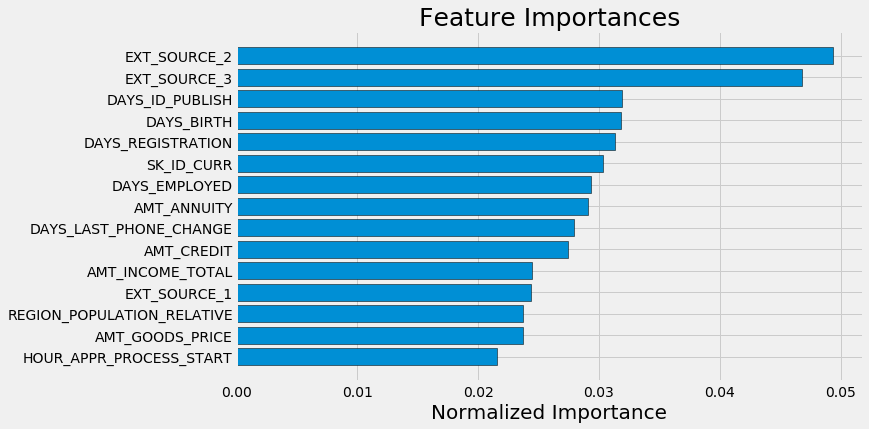

In [79]:
# Show the feature importances for the default features
feature_importances_sorted = plot_feature_importances(feature_importances)

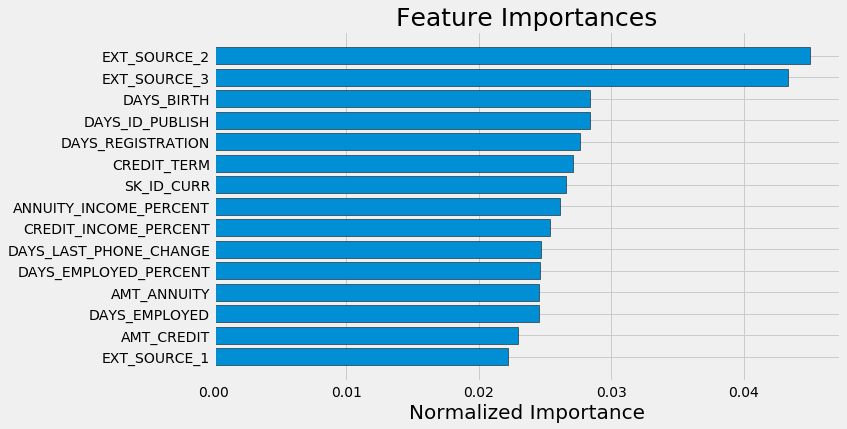

In [81]:
feature_importances_domain_sorted = plot_feature_importances(feature_importance_domain)

머신러닝 대회에서 어떻게 해야하는지 대략적인 절차와 방법에 대해 알아볼 수 있는 커널이었음. 데이터는 어떻게 탐색하고 EDA 는 어떻게 하고 시각화, feature engineering, model 구축, 결론 도출을 어떤 식으로 수행해야하는지.  
중간에 더 넣으면 좋을 것들 그리고 더 깊은 차원축소, 변수 선택, 모델 파라메타 설정 등 복잡한 많은 단계들이 남았지만 그건 차차 넣어간다고 생각.  
어떤 모델을 사용하고 어떤 모델을 사용해서 성능을 더 올리며, 그리고 그 모델을 더욱 고도화 하기 위해서는 어떻게 해야하는지 등  
아직 배워야할 것들이 많음.  
차원축소, 더욱 좋은 모델 사용, 모델 파라메타 수정 등이 더 필요.  
모델 성능 향상을 위해 결측치 어떻게 다르게 넣을지, 전처리 어떻게 다르게 할지 등등 너무나도 다양한 방법이 있음.  

* LGBM 사용하면 0.75 이상 성능이 급격히 상승.
* 대회의 최고 성능은 0.80570
* Leaderboard 보면 순위 나옴. 성능이랑